In [1]:
import numpy as np
import pandas as pd

import math
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# sns.set_style('whitegrid')

## Import Data

In [2]:
from keras.datasets import reuters

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
train_data[0][:15]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16]

In [5]:
print(len(train_data), len(test_data))

8982 2246


In [6]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [7]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
        return results

In [12]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
from keras import models
from keras import layers

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [31]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 249us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0341 - val_accuracy: 0.0000e+00
Epoch 2/20
7982/7982 [==============================] - 2s 244us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0289 - val_accuracy: 0.0000e+00
Epoch 3/20
7982/7982 [==============================] - 2s 244us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0286 - val_accuracy: 0.0000e+00
Epoch 4/20
7982/7982 [==============================] - 2s 242us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0548 - val_accuracy: 0.0000e+00
Epoch 5/20
7982/7982 [==============================] - 2s 243us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0301 - val_accuracy: 0.0000e+00
Epoch 6/20
7982/7982 [==============================] - 2s 253us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0938 - val_accuracy: 0.0000e+00
Epoc

In [35]:
print(history.history)

{'val_loss': [0.0341015625, 0.0289384765625, 0.028633813858032226, 0.05480905532836914, 0.030134515762329103, 0.09375408172607422, 0.04352919769287109, 0.038744140625, 0.04181541442871094, 0.08248847198486328, 0.1377869110107422, 0.04700882339477539, 0.042390819549560546, 0.08112606048583984, 0.11979068756103516, 0.046232421875, 0.042291133880615235, 0.0841474609375, 0.07235742950439453, 0.1932152557373047], 'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


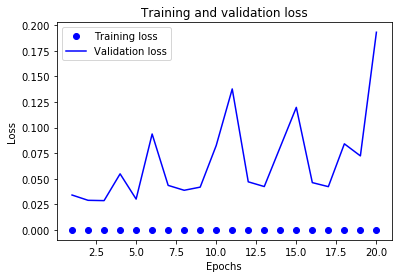

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

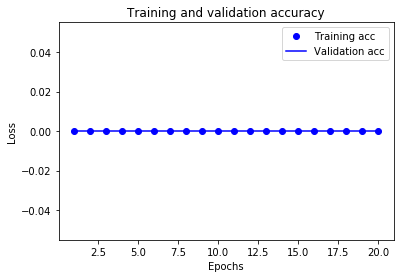

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 264us/step - loss: 0.0000e+00 - accuracy: 3.7585e-04 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 2/9
7982/7982 [==============================] - 2s 248us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 3/9
7982/7982 [==============================] - 2s 240us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 4/9
7982/7982 [==============================] - 2s 246us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 5/9
7982/7982 [==============================] - 2s 249us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0106 - val_accuracy: 0.0000e+00
Epoch 6/9
7982/7982 [==============================] - 2s 265us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 7/9


In [26]:
results

[0.013082764133850804, 0.0]